In [1]:
import sys
import numpy
import argparse
from dataset import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib.cm as colormap

import tensorflow
from tensorflow.python.ops import control_flow_ops 
tensorflow.python.control_flow_ops = control_flow_ops

Using TensorFlow backend.


In [2]:
def plot_acc(history):
    figure = plt.gcf()
    figure.set_size_inches(24, 9)
    ax = plt.subplot()
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    colors = iter(colormap.gist_rainbow(numpy.linspace(0, 1, len(history))))
    for i in xrange(len(history)):
        color=next(colors)
        plt.plot(history[i].history['acc'], label='Train '+str(i), color=color, linestyle = 'solid')
        plt.plot(history[i].history['val_acc'], label='Test '+str(i), color=color, linestyle = 'dotted')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.0,1.0))
    plt.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

In [3]:
def plot_loss(history):
    figure = plt.gcf()
    figure.set_size_inches(24, 9)
    ax = plt.subplot()
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    colors = iter(colormap.gist_rainbow(numpy.linspace(0, 1, len(history))))
    for i in xrange(len(history)):
        color=next(colors)
        plt.plot(history[i].history['loss'], label='Train '+str(i), color=color, linestyle = 'solid')
        plt.plot(history[i].history['val_loss'], label='Test '+str(i), color=color, linestyle = 'dotted')
    plt.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

In [4]:
dataset = 'Datasets/VGG16-Features.pkl'

In [5]:
ds = Dataset()
X, y, list_fams, no_imgs = ds.load(dataset)

In [6]:
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = np_utils.to_categorical(y_encoded)

In [7]:
clf = Sequential()
clf.add(Dense(160, input_shape=(X.shape[1],), activation='relu', name='fc1'))
clf.add(Dropout(0.2))
clf.add(Dense(160, activation='relu', name='fc2'))
clf.add(Dropout(0.2))
clf.add(Dense(Y.shape[1], activation='softmax', name='predictions'))

clf.load_weights('BestModel-max_val_acc-mlp-vgg16-2layers-160neurons-relu-0.2dropout-Adam-400epochs.h5')

clf.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
         
y_predict = clf.predict_classes(X, verbose=0)
print("Acurracy: %.4f" %(accuracy_score(y,y_predict)))

Acurracy: 0.9942


Plotting the confusion matrix


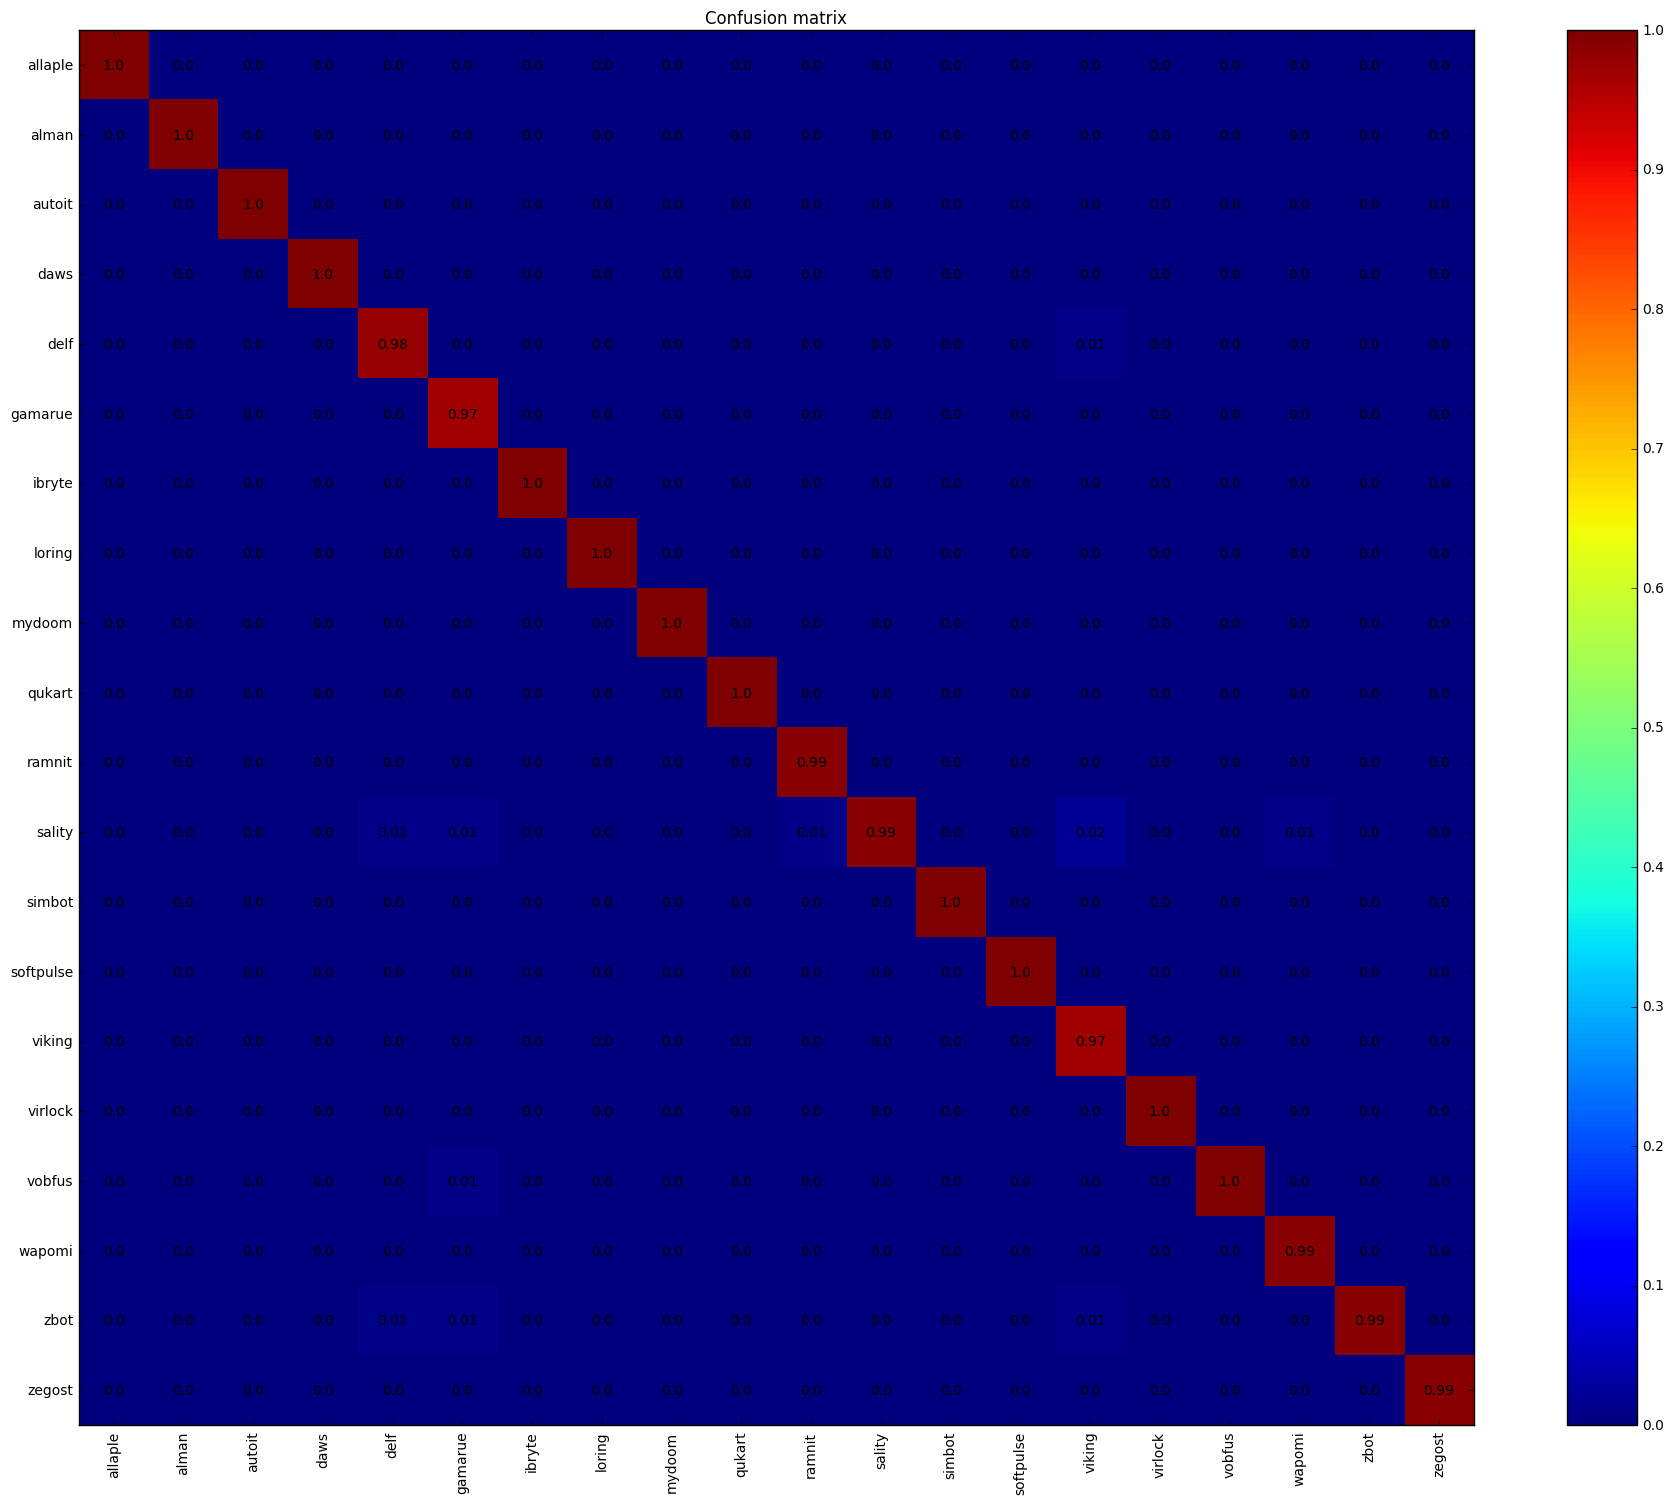

In [8]:
print("Plotting the confusion matrix")
conf_mat = numpy.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
conf_mat = conf_mat + confusion_matrix(y,y_predict)  # Compute confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix
conf_mat = numpy.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in xrange(len(list_fams)):
    for col in xrange(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()